# <center>L2 Computational Physics</center>
---

## Gradient Descent

In this notebook, you shall illustrate the different behaviours of the gradient descent (GD) method when finding the minima of 
*Rosenbrock's Banana Function*,

$$f(x,y) \equiv (1-x)^{2} + 100(y-x^{2})^{2}~.$$

You will generate a plot demonstrating how the behaviour of the GD method changes with different values of the step-size parameter, $\eta$. To do this, you will plot example GD trajectories using three different $\eta$ values. 

In [1]:
import numpy
from matplotlib import pyplot as plt
import matplotlib.colors
from random import random

First, define the functions `f` and `grad` which implement the *banana* function and its **analytical** derivative. 
`r` is a two component array of coordinates.

In [2]:
def f(r):
    x, y = r
    function = (1-r[0])**2 + 100*(r[1]-r[0]**2)**2
    return function;
    
def grad(r):
    x, y = r
    dx = -2*(1-r[0])-400*r[0]*(r[1] - r[0]**2)
    dy = 200*(r[1] - r[0]**2)
    return dx,dy;

Before proceeding, ensure that your functions have been written correctly:

In [3]:
# these tests are worth 2 marks 
r = numpy.array([1, 4])
assert numpy.isclose(f(r), 900)
assert numpy.isclose(grad(r), numpy.array([-1200,   600])).all()

Implement the function `gradientDescent`. It takes as argument:

- `df`: the derivative of the the function you want to minimize
- `r0`: an array of two initial values where the algorithm starts
- `eta`: the step size
- `nstep`: the number of steps

It should return the history of points visited, including the initial one.

In [4]:
def gradientDescent(df, r0, eta, nstep):
    x,y = r0
    history = []
    for i in range(0,nstep+1):
        history.append(r0)
        array = numpy.array(df(r0))
        r0 = r0 - eta*array
    history = numpy.array(history)
    return history;


Test your answer:

In [5]:
# these tests are worth 3 marks 
gdtest = gradientDescent(grad, [0.3,0.4], 0.01, 2)
assert gdtest.shape == (3,2)
assert numpy.isclose(gdtest, numpy.array([
        [ 0.3       ,  0.4       ],
        [ 0.686     , -0.22      ],
        [-1.20271542,  1.161192  ]])).all()

## Plotting task

Create a plot to show the trajectory of the gradient descent optimisation algorithm for different values of $\eta$. Use the values of $\eta$ provided. Start all trajectories at $r_0=(0.2,1)$. [3 marks]

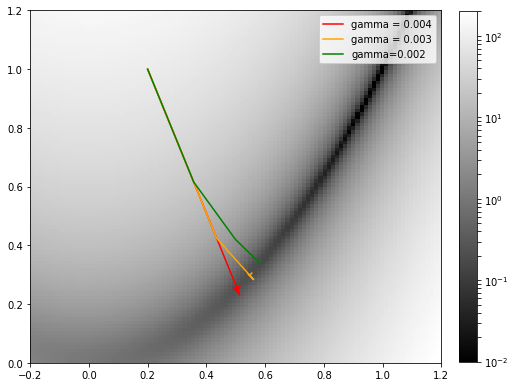

In [12]:
# Generate banana function
N = 100 # Resolution of 2D image
x0 = -0.2
x1 = 1.2
y0 = 0
y1 = 1.2
xs = numpy.linspace(x0, x1, N)
ys = numpy.linspace(y0, y1, N)
dat = numpy.zeros((N, N))

for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        r = [x,y]
        dat[iy, ix] = f(r)

plt.figure(figsize=(8,8))
im = plt.imshow(dat, extent=(x0, x1, y0, y1), origin='lower', cmap=matplotlib.cm.gray, 
                norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=200))
plt.colorbar(im, orientation='vertical', fraction=0.03925, pad=0.04)

# Now generate the trajectories:
gammas = [0.004, 0.003, 0.002]  # Gammas to try out
r0 = numpy.array([0.2, 1])  # Initial seed point

x1,x2,x3,y1,y2,y3 = [],[],[],[],[],[]
t1 = gradientDescent(grad,r0,gammas[0],50)
t2 = gradientDescent(grad,r0,gammas[1],50)
t3 = gradientDescent(grad,r0,gammas[2],50)

for i in range(10):
    x1.append(t1[i][0])
    x2.append(t2[i][0])
    x3.append(t3[i][0])
    y1.append(t1[i][1])
    y2.append(t2[i][1])
    y3.append(t3[i][1])
    
plt.plot(x1,y1,color='red',label='gamma = 0.004')
plt.plot(x2,y2,color='orange',label='gamma = 0.003')
plt.plot(x3,y3,color='green',label='gamma=0.002')
plt.legend()

Which of the three step size $\eta$ is best? Use the box below to justify your answer. [2 marks]

When $\eta$ is 0.002 because as can be seen from the graph the step size is such that this is the fastest convergence to the minimum but also does not lose convergence as can occur with $\eta$ too large. The other values for $\eta$, 0.003 and 0.004  oscillate after a few hundred steps as can be seen near the line, but this is not noticable (at least on our plot) when $\eta$ is 0.002.